<a href="https://colab.research.google.com/github/natthanich/bsc_dpdm22/blob/main/%5Bdataprep1%5Dproperty_estimator(%E0%B9%80%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%81%E0%B9%84%E0%B8%9F%E0%B8%A5%E0%B9%8C%E0%B8%88%E0%B8%B2%E0%B8%81_gg_sheet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import sheets


Reference: https://github.com/prasertcbs/pandas/blob/main/read%20multiple%20sheets%20from%20google%20sheets.ipynb

In [1]:
import pandas as pd
link ='https://docs.google.com/spreadsheets/d/12VnHzIryO-CyDA0NcDQ8xYKvFigxxSjLfDxYEDB3VjA/export?format=xlsx'

# การหาค่า MAPE

In [2]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

## บ้าน

In [3]:
Home = pd.read_excel(link, sheet_name='บ้าน')
id1 = Home[Home['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
id2 = Home[Home['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมินโดย1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมินโดย1'])
two2one = MAPE(id2_d['ประเมินโดย1'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 14.50%
นักประเมิน คนที่ 2 = 11.14%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 14.56%
จำนวนทรัพย์ทั้งหมด 498 ทรัพย์


In [4]:
id2_d.columns #เรียกดูว่ามีคอลัมน์อะไรบ้าง

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์', 'ประเมินโดย1'],
      dtype='object')

In [5]:
home = id2_d[['post id','ราคาทรัพย์','ประเมินโดย1', 'ประเมินราคาซื้อ-ขาย']] #เลือกคอลัมน์ที่ต้องการ
home.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'},inplace=True) #เปลี่ยนชื่อคอลัมน์ ประเมินราคาซื้อ-ขาย' เป็น 'ประเมินโดย2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## ที่ดิน

In [6]:
Land = pd.read_excel(link, sheet_name='ที่ดิน')
id1 = Land[Land['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
id2 = Land[Land['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมินโดย1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมินโดย1'])
two2one = MAPE(id2_d['ประเมินโดย1'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 58.41%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


In [7]:
id2_d.columns #เรียกดูว่ามีคอลัมน์อะไรบ้าง

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์', 'ประเมินโดย1'],
      dtype='object')

In [8]:
land = id2_d[['post id','ราคาทรัพย์','ประเมินโดย1', 'ประเมินราคาซื้อ-ขาย']] #เลือกคอลัมน์ที่ต้องการ
land.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'},inplace=True) #เปลี่ยนชื่อคอลัมน์ ประเมินราคาซื้อ-ขาย' เป็น 'ประเมินโดย2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## ทาวน์โฮม

In [9]:
Townh = pd.read_excel(link, sheet_name='ทาวน์โฮม')
id1 = Townh[Townh['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
id2 = Townh[Townh['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมินโดย1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมินโดย1'])
two2one = MAPE(id2_d['ประเมินโดย1'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


In [10]:
id2_d.columns #เรียกดูว่ามีคอลัมน์อะไรบ้าง

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'ประเมินโดย1'],
      dtype='object')

In [11]:
townh = id2_d[['post id','ราคาทรัพย์','ประเมินโดย1', 'ประเมินราคาซื้อ-ขาย']] #เลือกคอลัมน์ที่ต้องการ
townh.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'},inplace=True) #เปลี่ยนชื่อคอลัมน์ ประเมินราคาซื้อ-ขาย' เป็น 'ประเมินโดย2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


## อาคารพาณิชย์

In [12]:
Comm = pd.read_excel(link, sheet_name='อาคารพาณิชย์')
id1 = Comm[Comm['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
id2 = Comm[Comm['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมินโดย1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมินโดย1'])
two2one = MAPE(id2_d['ประเมินโดย1'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 20.25%
นักประเมิน คนที่ 2 = 9.49%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 12.53%
จำนวนทรัพย์ทั้งหมด 91 ทรัพย์


In [13]:
id2_d.columns #เรียกดูว่ามีคอลัมน์อะไรบ้าง

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์', 'ประเมินโดย1'],
      dtype='object')

In [14]:
comm = id2_d[['post id','ราคาทรัพย์','ประเมินโดย1', 'ประเมินราคาซื้อ-ขาย']] #เลือกคอลัมน์ที่ต้องการ
comm.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'},inplace=True) #เปลี่ยนชื่อคอลัมน์ ประเมินราคาซื้อ-ขาย' เป็น 'ประเมินโดย2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


# HW2 แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

## เขียน function ตรวจสอบค่าที่เติม 0 ผิด

In [15]:
max(10,2)

10

In [16]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [17]:
check_v(100,12)

8.333333333333334

#### สร้าง column ใหม่ ลงในตาราง home โดย ค่าใน column คือค่า จาก function check(ราคาตั้งขาย,ราคาประเมิน1)

#### วิธีเพื่อน

In [ ]:
# วิธีเพื่อน ได้เหมือนกัน ง่าย กว่า // ใช้คู่กับ  def check_v(in1,in2):   // ต้องสร้าง function  มาก่อน
                                         #return max(in1/in2,in2/in1)
home['check1']=home.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย1']),axis=1)
home['check2']=home.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย2']),axis=1)
home

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,1.156000,1.070370
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,1.210000,1.487603
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,1.147541,1.220000
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,1.694915,1.016949
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,1.025000,1.230000


### บ้าน

In [18]:
check1 = list()
for row in home.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย1']))
home['check1'] = check1

check2 = list()
for row in home.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย2']))
home['check2'] = check2

home

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,1.156000,1.070370
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,1.210000,1.487603
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,1.147541,1.220000
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,1.694915,1.016949
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,1.025000,1.230000


In [19]:
home.sort_values(by=['check1'],ascending=False)  # ตัด 802

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
228,https://nayoo.co/khonkaen/posts/525,1933000,830000.0,2200000.0,2.328916,1.138127
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
767,https://nayoo.co/khonkaen/posts/2321,465000,900000.0,400000.0,1.935484,1.162500
...,...,...,...,...,...,...
266,https://nayoo.co/khonkaen/posts/585,3300000,3300000.0,3500000.0,1.000000,1.060606
63,https://nayoo.co/khonkaen/posts/2033,1200000,1200000.0,1000000.0,1.000000,1.200000
652,https://nayoo.co/khonkaen/posts/2256,2000000,2000000.0,2200000.0,1.000000,1.100000
43,https://nayoo.co/khonkaen/posts/1128,4200000,4200000.0,5000000.0,1.000000,1.190476


In [20]:
home.sort_values(by=['check2'],ascending=False) #ตัด 802 / ลด 0 544 /ลด 0292

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
544,https://nayoo.co/khonkaen/posts/1619,2850000,2500000.0,29000000.0,1.140000,10.175439
292,https://nayoo.co/khonkaen/posts/622,8019000,7900000.0,80000000.0,1.015063,9.976306
75,https://nayoo.co/khonkaen/posts/1,390000,600000.0,1300000.0,1.538462,3.333333
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
...,...,...,...,...,...,...
806,https://nayoo.co/khonkaen/posts/3210,2390000,2500000.0,2390000.0,1.046025,1.000000
169,https://nayoo.co/khonkaen/posts/11264,6500000,5600000.0,6500000.0,1.160714,1.000000
763,https://nayoo.co/khonkaen/posts/2319,1200000,1200000.0,1200000.0,1.000000,1.000000
1149,https://nayoo.co/khonkaen/posts/6096,2200000,2200000.0,2200000.0,1.000000,1.000000


### ที่ดิน

In [21]:
check1 = list()
for row in land.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย1']))
land['check1'] = check1

check2 = list()
for row in land.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย2']))
land['check2'] = check2

land

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,1.555556,1.400000
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,1.862500,1.241667
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,1.857143,1.083333
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,1.363636,1.200000
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,1.325000,1.060000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846,1.153846


In [22]:
land.sort_values(by=['check1'],ascending=False) # 194 เติม 0 /112 ลด 0 /47,58 ตัด

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
194,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,75000000.0,20.000000,1.200000
112,https://nayoo.co/khonkaen/posts/7955,2600000,32000000.0,2000000.0,12.307692,1.300000
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,1000000.0,800000.0,1.020408,1.225000
100,https://nayoo.co/khonkaen/posts/1663,1485000,1500000.0,1200000.0,1.010101,1.237500
122,https://nayoo.co/khonkaen/posts/12762,650000,650000.0,700000.0,1.000000,1.076923


In [23]:
land.sort_values(by=['check2'],ascending=False)  # 47,58 ตัด / 148 ลด 0/188 ลด 0

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
148,https://nayoo.co/khonkaen/posts/3561,7374550,6000000.0,80000000.0,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,24000000.0,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,2800000.0,8000000.0,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,7990000,10000000.0,8000000.0,1.251564,1.001252
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
158,https://nayoo.co/khonkaen/posts/6732,3500000,2800000.0,3500000.0,1.250000,1.000000


### ทาวน์โฮม

In [24]:
check1 = list()
for row in townh.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย1']))
townh['check1'] = check1

check2 = list()
for row in townh.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย2']))
townh['check2'] = check2

townh

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,1.388889,1.587302
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,1.838235,1.470588
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0,1.105000,1.085973
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0,1.041667,1.180556
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0,1.250000,1.052632
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0,1.118750,1.052941


In [25]:
townh.sort_values(by=['check1'],ascending=False) #ตัด 176

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,1.838235,1.470588
206,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
216,https://nayoo.co/khonkaen/posts/17535,840000,1300000.0,1000000.0,1.547619,1.190476
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,1.492857,1.435407
...,...,...,...,...,...,...
162,https://nayoo.co/khonkaen/posts/2242,1610000,1600000.0,1600000.0,1.006250,1.006250
228,https://nayoo.co/khonkaen/posts/17923,1990000,2000000.0,2200000.0,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000,2500000.0,2300000.0,1.004016,1.082609
200,https://nayoo.co/khonkaen/posts/13411,3200000,3200000.0,3200000.0,1.000000,1.000000


In [26]:
townh.sort_values(by=['check2'],ascending=False) 

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,2850000,2800000.0,1500000.0,1.017857,1.900000
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,1.388889,1.587302
206,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
...,...,...,...,...,...,...
202,https://nayoo.co/khonkaen/posts/15111,2200000,2500000.0,2200000.0,1.136364,1.000000
209,https://nayoo.co/khonkaen/posts/17511,1700000,1500000.0,1700000.0,1.133333,1.000000
212,https://nayoo.co/khonkaen/posts/17516,1800000,1700000.0,1800000.0,1.058824,1.000000
213,https://nayoo.co/khonkaen/posts/17518,1200000,1100000.0,1200000.0,1.090909,1.000000


### อาคารพาณิชย์

In [27]:
check1 = list()
for row in comm.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย1']))
comm['check1'] = check1

check2 = list()
for row in comm.iterrows():
    check2.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย2']))
comm['check2'] = check2

comm

<ipython-input-27-b4dc28ab9d7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['check1'] = check1
<ipython-input-27-b4dc28ab9d7f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['check2'] = check2


,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0,1.100000,1.212121
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0,1.052632,1.052632
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
...,...,...,...,...,...,...
183,https://nayoo.co/khonkaen/posts/6168,2652000,3000000.0,2700000.0,1.131222,1.018100
185,https://nayoo.co/khonkaen/posts/6169,3851000,3800000.0,4000000.0,1.013421,1.038691
187,https://nayoo.co/khonkaen/posts/6176,3410000,3200000.0,3500000.0,1.065625,1.026393
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0,1.083333,1.025641


In [28]:
comm.sort_values(by=['check1'],ascending=False) 

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
169,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
81,https://nayoo.co/khonkaen/posts/701,1925000,2700000.0,2000000.0,1.402597,1.038961
...,...,...,...,...,...,...
61,https://nayoo.co/khonkaen/posts/643,4180000,4200000.0,4200000.0,1.004785,1.004785
65,https://nayoo.co/khonkaen/posts/651,2200000,2200000.0,2000000.0,1.000000,1.100000
161,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
177,https://nayoo.co/khonkaen/posts/6123,2200000,2200000.0,2200000.0,1.000000,1.000000


In [29]:
comm.sort_values(by=['check2'],ascending=False) 

,post id,ราคาทรัพย์,ประเมินโดย1,ประเมินโดย2,check1,check2
163,https://nayoo.co/khonkaen/posts/6009,2250000,2700000.0,5000000.0,1.200000,2.222222
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
161,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
49,https://nayoo.co/khonkaen/posts/602,2520000,3300000.0,3500000.0,1.309524,1.388889
169,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
...,...,...,...,...,...,...
121,https://nayoo.co/khonkaen/posts/2180,5000000,4000000.0,5000000.0,1.250000,1.000000
109,https://nayoo.co/khonkaen/posts/1885,3500000,3400000.0,3500000.0,1.029412,1.000000
107,https://nayoo.co/khonkaen/posts/1858,1500000,2000000.0,1500000.0,1.333333,1.000000
101,https://nayoo.co/khonkaen/posts/1614,2500000,2700000.0,2500000.0,1.080000,1.000000


## การหาค่า MAPE หลังทำการตรวจสอบค่าที่เติม 0 ผิด

In [30]:
import pandas as pd
url ='https://docs.google.com/spreadsheets/d/1ijONVt1JlrvleUqll5_m2SUbVBYtrmJhmNwXYdUMnVs/export?format=xlsx'

In [31]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

### บ้าน

In [32]:
Home = pd.read_excel(url, sheet_name='บ้าน')
id1 = Home[Home['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
id2 = Home[Home['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมินโดย1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมินโดย1'])
two2one = MAPE(id2_d['ประเมินโดย1'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 12.97%
นักประเมิน คนที่ 2 = 8.82%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 12.45%
จำนวนทรัพย์ทั้งหมด 497 ทรัพย์


In [33]:
id2_d.columns #เรียกดูว่ามีคอลัมน์อะไรบ้าง

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์', 'ประเมินโดย1'],
      dtype='object')

In [34]:
home = id2_d[['post id','ราคาทรัพย์','ประเมินโดย1', 'ประเมินราคาซื้อ-ขาย','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']] #เลือกคอลัมน์ที่ต้องการ
home.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'},inplace=True) #เปลี่ยนชื่อคอลัมน์ ประเมินราคาซื้อ-ขาย' เป็น 'ประเมินโดย2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### ที่ดิน

In [35]:
Land = pd.read_excel(url, sheet_name='ที่ดิน')
id1 = Land[Land['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
id2 = Land[Land['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมินโดย1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมินโดย1'])
two2one = MAPE(id2_d['ประเมินโดย1'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')
# %หลังทำการตัด 0 เกินออกมี error น้อยกว่า

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 45.13%
นักประเมิน คนที่ 2 = 19.89%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 32.23%
จำนวนทรัพย์ทั้งหมด 98 ทรัพย์


In [36]:
land = id2_d[['post id','ราคาทรัพย์','ประเมินโดย1', 'ประเมินราคาซื้อ-ขาย','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']] #เลือกคอลัมน์ที่ต้องการ
land.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'},inplace=True) #เปลี่ยนชื่อคอลัมน์ ประเมินราคาซื้อ-ขาย' เป็น 'ประเมินโดย2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### ทาวน์โฮม

In [37]:
Townh = pd.read_excel(url, sheet_name='ทาวน์โฮม')
id1 = Townh[Townh['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
id2 = Townh[Townh['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมินโดย1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมินโดย1'])
two2one = MAPE(id2_d['ประเมินโดย1'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 10.97%
นักประเมิน คนที่ 2 = 8.54%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 10.89%
จำนวนทรัพย์ทั้งหมด 119 ทรัพย์


In [38]:
townh = id2_d[['post id','ราคาทรัพย์','ประเมินโดย1', 'ประเมินราคาซื้อ-ขาย','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']] #เลือกคอลัมน์ที่ต้องการ
townh.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'},inplace=True) #เปลี่ยนชื่อคอลัมน์ ประเมินราคาซื้อ-ขาย' เป็น 'ประเมินโดย2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### อาคารพาณิชย์

In [39]:
Comm = pd.read_excel(url, sheet_name='อาคารพาณิชย์')
id1 = Comm[Comm['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])  #ในที่นี้ควร Dropna เพราะไม่ทราบค่า //เเต่มีวิธีที่ดีกว่า คือการที่ดูปัจจัยแวดล้อมแล้วนำมาวิเคราะห์หาแนวโน้มของข้อมูลิล // เอาทุกค่าที่่มีอยู่มาสร้างโมเดลเพื่อทำนายค่าที่หายไป
id2 = Comm[Comm['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = MAPE(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = MAPE(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมินโดย1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดย1','ราคาทรัพย์'])
one2two = MAPE(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมินโดย1'])
two2one = MAPE(id2_d['ประเมินโดย1'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้งสอง {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 20.25%
นักประเมิน คนที่ 2 = 9.49%
ความผิดพลาดระหว่างนักประเมินทั้งสอง 12.53%
จำนวนทรัพย์ทั้งหมด 91 ทรัพย์


In [40]:
comm = id2_d[['post id','ราคาทรัพย์','ประเมินโดย1', 'ประเมินราคาซื้อ-ขาย','ความมั่นใจในการเมินราคาทรัพย์','ให้คะแนนทรัพย์']] #เลือกคอลัมน์ที่ต้องการ
comm.rename(columns={'ประเมินราคาซื้อ-ขาย': 'ประเมินโดย2'},inplace=True) #เปลี่ยนชื่อคอลัมน์ ประเมินราคาซื้อ-ขาย' เป็น 'ประเมินโดย2

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


# HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

In [41]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [42]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

### ตรวจสอบ

In [43]:
home.isnull().any()

post id                          False
ราคาทรัพย์                       False
ประเมินโดย1                      False
ประเมินโดย2                      False
ความมั่นใจในการเมินราคาทรัพย์    False
ให้คะแนนทรัพย์                   False
dtype: bool

In [44]:
land.isnull().any()

post id                          False
ราคาทรัพย์                       False
ประเมินโดย1                      False
ประเมินโดย2                      False
ความมั่นใจในการเมินราคาทรัพย์    False
ให้คะแนนทรัพย์                   False
dtype: bool

In [45]:
home['ราคาทรัพย์'].max()

22500000

In [46]:
land['ราคาทรัพย์'].max()

286000000

In [47]:
townh['ราคาทรัพย์'].max()

4730000

In [48]:
comm['ราคาทรัพย์'].max()

22500000

In [49]:
len(land)

98

## ดูแนวโน้มระหว่างราคาทรัพย์และการประเมินราคา

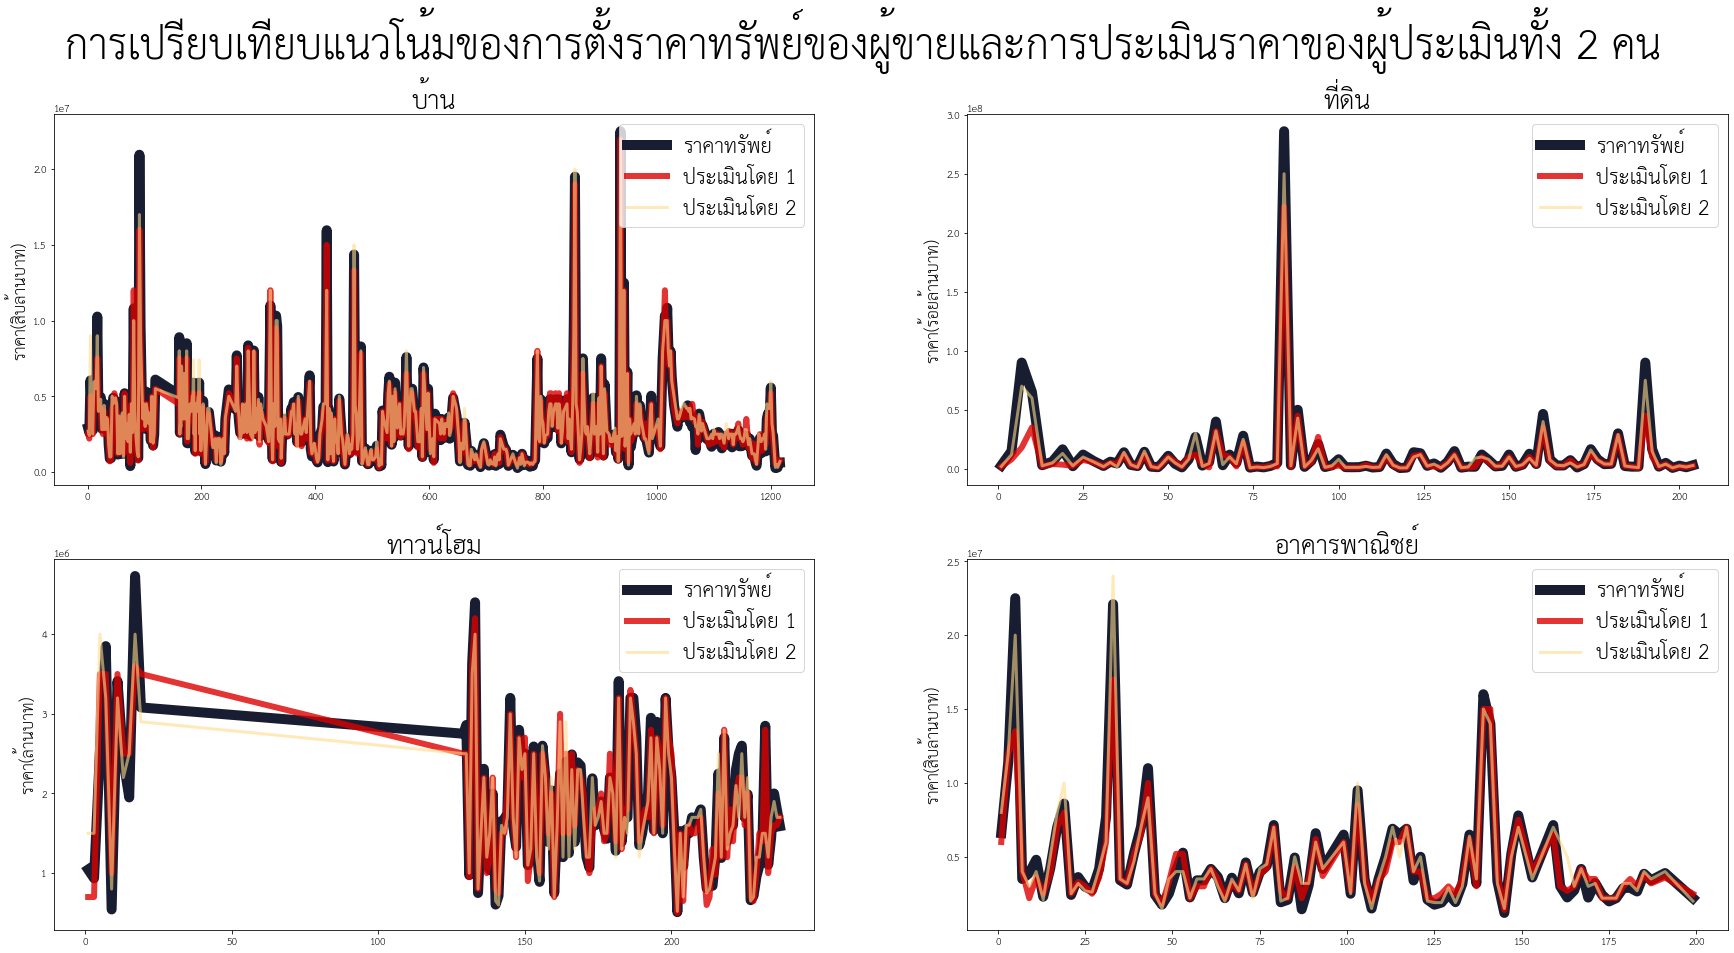

In [50]:
mpl.rcParams['figure.figsize']=[30,15]
plt.suptitle('การเปรียบเทียบแนวโน้มของการตั้งราคาทรัพย์ของผู้ขายและการประเมินราคาของผู้ประเมินทั้ง 2 คน',fontsize = 40)

plt.subplot(2,2,1)
plt.plot(home['ราคาทรัพย์'], color = "#181D31", linewidth = '10',label = 'ราคาทรัพย์')
plt.plot(home['ประเมินโดย1'], color = "#DC0000", alpha = 0.8,linewidth = '6',label = 'ประเมินโดย 1')
plt.plot(home['ประเมินโดย2'], color = "#FFDB89" ,alpha = 0.6,linewidth = '3',label = 'ประเมินโดย 2')
plt.title('บ้าน',fontsize=25)
plt.ylabel('ราคา(สิบล้านบาท)',fontsize=16)
plt.legend(loc='upper right' ,fontsize = 20,)#ให้คำอธิบายตรงกรอบโชว์ออกมา() #ให้คำอธิบายตรงกรอบโชว์ออกมา


plt.subplot(2,2,2)
plt.plot(land['ราคาทรัพย์'], color = "#181D31", linewidth = '10',label = 'ราคาทรัพย์')
plt.plot(land['ประเมินโดย1'], color = "#DC0000", alpha = 0.8,linewidth = '6',label = 'ประเมินโดย 1')
plt.plot(land['ประเมินโดย2'], color = "#FFDB89" ,alpha = 0.6,linewidth = '3',label = 'ประเมินโดย 2')
plt.title('ที่ดิน',fontsize=25)
plt.ylabel('ราคา(ร้อยล้านบาท)',fontsize=16)
plt.legend(loc='upper right' ,fontsize = 20)#ให้คำอธิบายตรงกรอบโชว์ออกมา() #ให้คำอธิบายตรงกรอบโชว์ออกมา


plt.subplot(2,2,3)
plt.plot(townh['ราคาทรัพย์'], color = "#181D31", linewidth = '10',label = 'ราคาทรัพย์')
plt.plot(townh['ประเมินโดย1'], color = "#DC0000", alpha = 0.8,linewidth = '6',label = 'ประเมินโดย 1')
plt.plot(townh['ประเมินโดย2'], color = "#FFDB89" ,alpha = 0.6,linewidth = '3',label = 'ประเมินโดย 2')
plt.title('ทาวน์โฮม',fontsize=25)
plt.ylabel('ราคา(ล้านบาท)',fontsize=16)
plt.legend(loc='upper right' ,fontsize = 20)#ให้คำอธิบายตรงกรอบโชว์ออกมา() #ให้คำอธิบายตรงกรอบโชว์ออกมา

plt.subplot(2,2,4)
plt.plot(comm['ราคาทรัพย์'], color = "#181D31", linewidth = '10',label = 'ราคาทรัพย์')
plt.plot(comm['ประเมินโดย1'], color = "#DC0000", alpha = 0.8,linewidth = '6',label = 'ประเมินโดย 1')
plt.plot(comm['ประเมินโดย2'], color = "#FFDB89" ,alpha = 0.6,linewidth = '3',label = 'ประเมินโดย 2')
plt.title('อาคารพาณิชย์',fontsize=25)
plt.ylabel('ราคา(สิบล้านบาท)',fontsize=16)
plt.legend(loc='upper right' ,fontsize = 20)#ให้คำอธิบายตรงกรอบโชว์ออกมา() #ให้คำอธิบายตรงกรอบโชว์ออกมา
plt.show()

## Corr

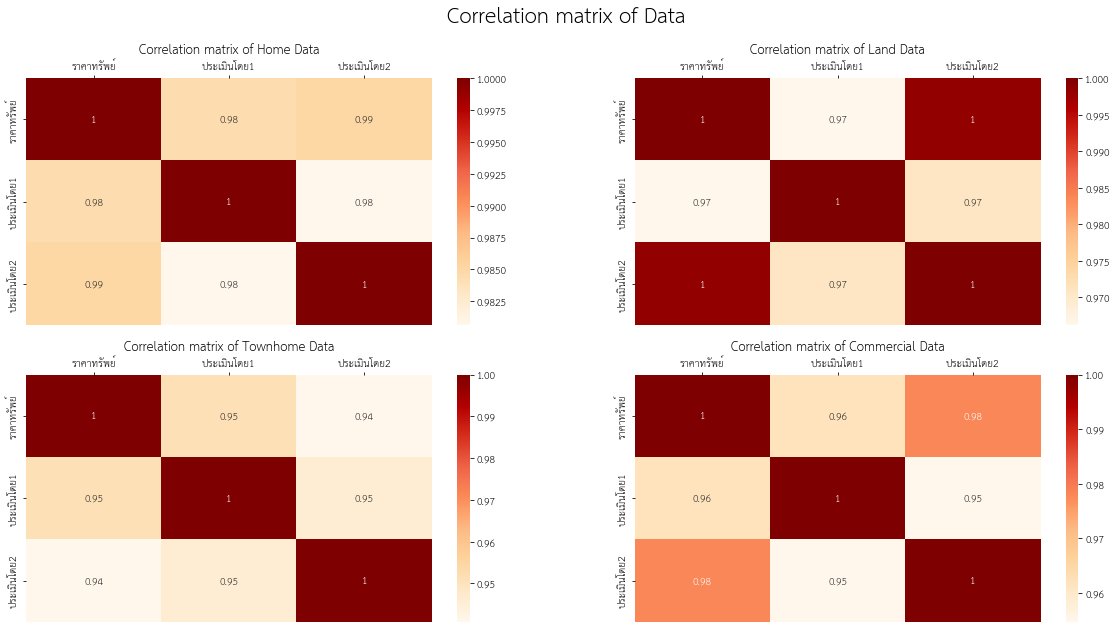

In [51]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 10))
fig.suptitle('Correlation matrix of Data',fontsize = 20)

sns.heatmap(home.corr(),annot = True,cmap = "OrRd", ax=ax[0,0]).xaxis.tick_top() #.xaxis.tick_top() = ให้ชื่อแกน x ขึ้นไปอยู๋ ด้านบน
ax[0,0].set_title('Correlation matrix of Home Data')

sns.heatmap(land.corr(), cmap = "OrRd", annot=True, ax=ax[0,1]).xaxis.tick_top()
ax[0,1].set_title('Correlation matrix of Land Data')

sns.heatmap(townh.corr(), cmap = "OrRd", annot=True, ax=ax[1,0]).xaxis.tick_top()
ax[1,0].set_title('Correlation matrix of Townhome Data')

sns.heatmap(comm.corr(), cmap = "OrRd", annot=True, ax=ax[1,1]).xaxis.tick_top()
ax[1,1].set_title('Correlation matrix of Commercial Data')

plt.show()

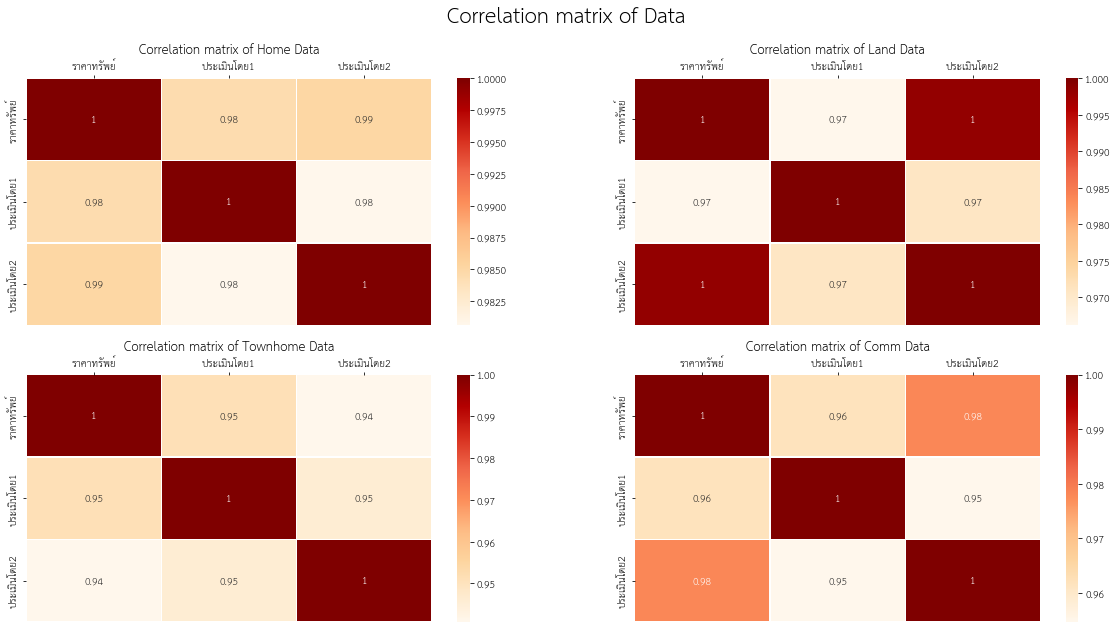

In [53]:
#อีกวิธี
mpl.rcParams['figure.figsize']=[20,10]
plt.suptitle('Correlation matrix of Data',fontsize = 20)

plt.subplot(2,2,1)
correlation_mat = home.corr()
ax = sns.heatmap(correlation_mat ,annot = True,cmap = "OrRd",linewidths=.3)
ax.xaxis.tick_top()
plt.title("Correlation matrix of Home Data")

plt.subplot(2,2,2)
correlation_mat = land.corr()
ax = sns.heatmap(correlation_mat,annot = True,cmap = "OrRd",linewidths=.3)
ax.xaxis.tick_top()
plt.title("Correlation matrix of Land Data")

plt.subplot(2,2,3)
correlation_mat = townh.corr()
ax = sns.heatmap(correlation_mat,annot = True,cmap = "OrRd",linewidths=.3)
ax.xaxis.tick_top()
plt.title("Correlation matrix of Townhome Data")

plt.subplot(2,2,4)
correlation_mat = comm.corr()
ax = sns.heatmap(correlation_mat,annot = True,cmap = "OrRd",linewidths=.3)
ax.xaxis.tick_top()
plt.title("Correlation matrix of Comm Data")
plt.show()

## ความมั่นใจในการประเมิน

In [ ]:
HC = Home.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
LC = Land.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
TC = Townh.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
CC = Comm.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])

HC = HC.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()
LC = LC.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()
TC = TC.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()
CC = CC.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count()

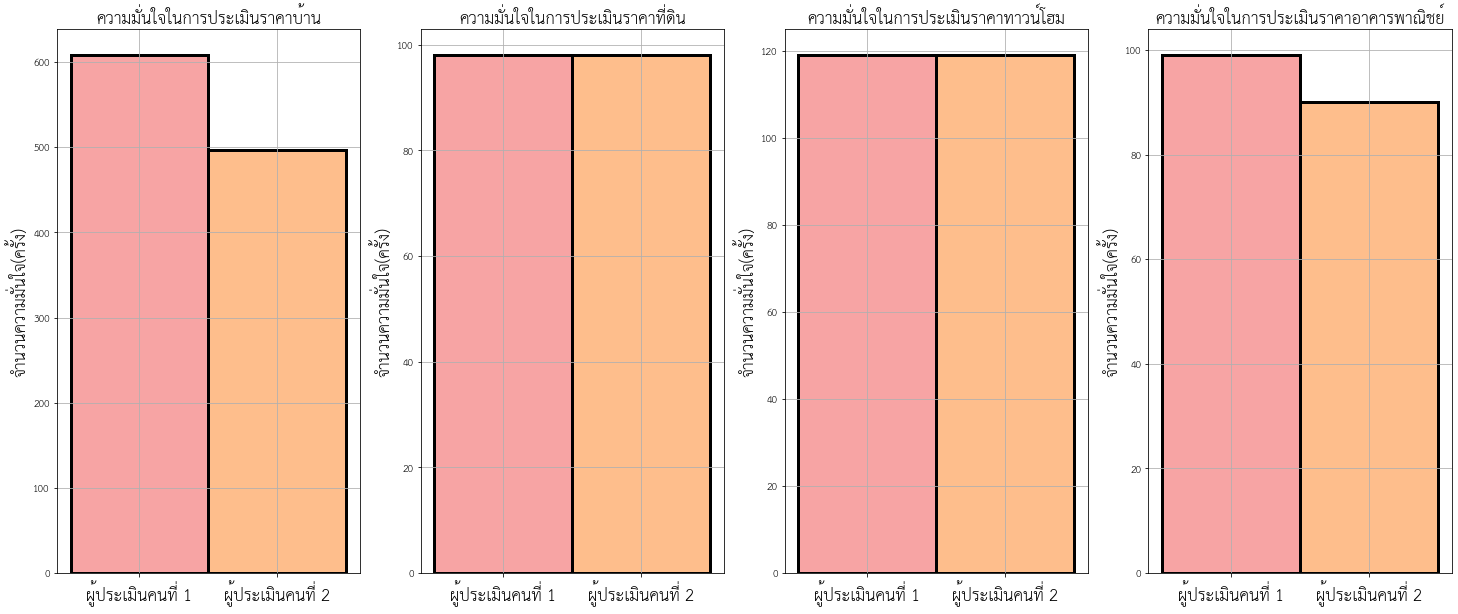

In [ ]:
mpl.rcParams['figure.figsize']=[25,10]

plt.subplot(1,4,1)
plt.bar([1,1.5],HC['ความมั่นใจในการเมินราคาทรัพย์'],ec="#000000", color=['#F7A4A4','#FEBE8C'],width=0.5,linewidth = 3) #เปลี่ยนสี เเท่งกราฟ
plt.xticks([1,1.5],['ผู้ประเมินคนที่ 1','ผู้ประเมินคนที่ 2'],fontsize=16)
plt.title('ความมั่นใจในการประเมินราคาบ้าน',fontsize=16)
plt.grid(True)
plt.ylabel('จำนวนความมั่นใจ(ครั้ง)',fontsize=16);

plt.subplot(1,4,2)
LC = LC.iloc[:2,]
plt.bar([1,1.5],LC['ความมั่นใจในการเมินราคาทรัพย์'],ec="#000000", color=['#F7A4A4','#FEBE8C'],width=0.5,linewidth = 3) #เปลี่ยนสี เเท่งกราฟ
plt.xticks([1,1.5],['ผู้ประเมินคนที่ 1','ผู้ประเมินคนที่ 2'],fontsize=16)
plt.title('ความมั่นใจในการประเมินราคาที่ดิน',fontsize=16)
plt.grid(True)
plt.ylabel('จำนวนความมั่นใจ(ครั้ง)',fontsize=16);

plt.subplot(1,4,3)
plt.bar([1,1.5],TC['ความมั่นใจในการเมินราคาทรัพย์'],ec="#000000", color=['#F7A4A4','#FEBE8C'],width=0.5,linewidth = 3) #เปลี่ยนสี เเท่งกราฟ
plt.xticks([1,1.5],['ผู้ประเมินคนที่ 1','ผู้ประเมินคนที่ 2'],fontsize=16)
plt.title('ความมั่นใจในการประเมินราคาทาวน์โฮม',fontsize=16)
plt.grid(True)
plt.ylabel('จำนวนความมั่นใจ(ครั้ง)',fontsize=16);

plt.subplot(1,4,4)
plt.bar([1,1.5],CC['ความมั่นใจในการเมินราคาทรัพย์'],ec="#000000", color=['#F7A4A4','#FEBE8C'],width=0.5,linewidth = 3) #เปลี่ยนสี เเท่งกราฟ
plt.xticks([1,1.5],['ผู้ประเมินคนที่ 1','ผู้ประเมินคนที่ 2'],fontsize=16)
plt.title('ความมั่นใจในการประเมินราคาอาคารพาณิชย์',fontsize=16)
plt.grid(True)
plt.ylabel('จำนวนความมั่นใจ(ครั้ง)',fontsize=16)
plt.show();

## ดูความสัมพันธ์ในการให้คะแนนทรัพย์กับการประเมินราคา

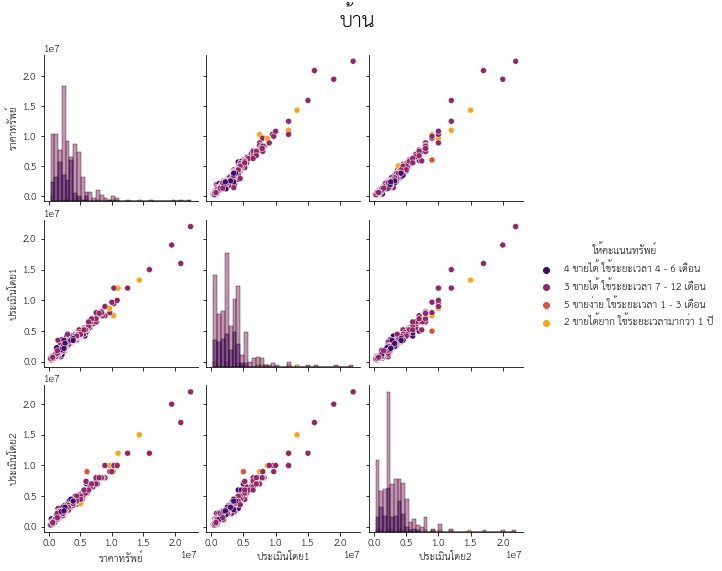

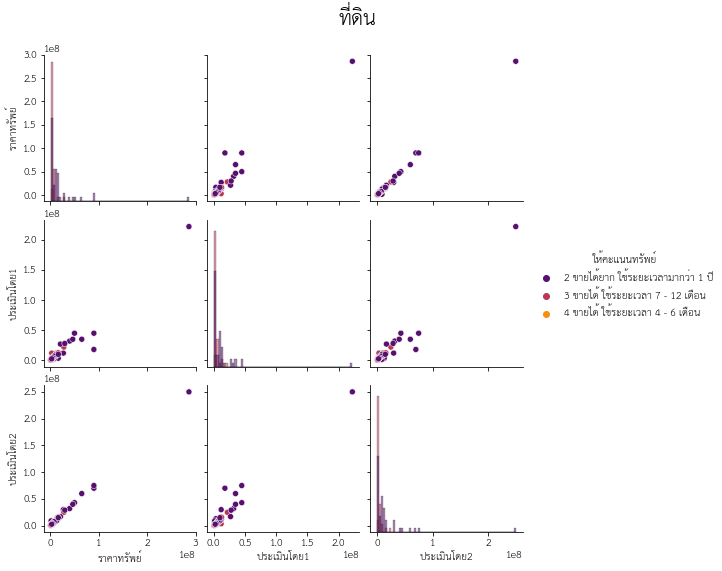

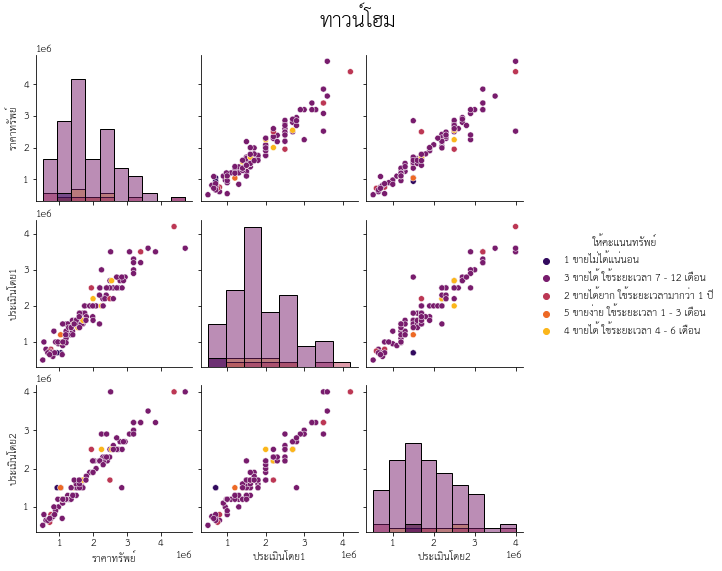

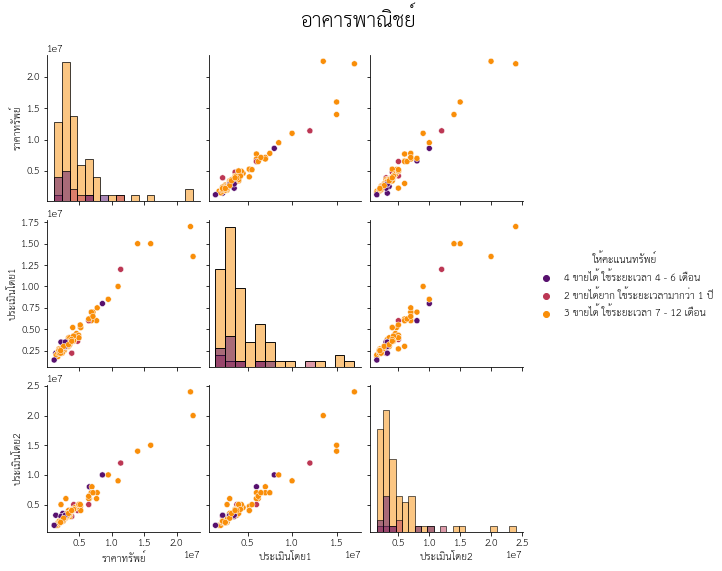

In [117]:
#pairplot ข้อมูลผ่านการ Normalization แล้ว?
#pairplot ดูคสพ.ของตัวแปร 3ตัว คือ ราคาทรัพย์ ประเมินโดย1 และ ประเมินโดย 2 เเละแบ่งจุดข้อมูล ตาม การให้คะแนนทรัพย์
sns.pairplot(home, hue ="ให้คะแนนทรัพย์",palette = "inferno", diag_kind="hist")# ,kind='reg',plot_kws={'line_kws':{'color':'red'}} เพิ่มเส้นตรงที่เเดง reg
plt.suptitle("บ้าน",fontsize = 20 ,y = 1.05)


sns.pairplot(land, hue ="ให้คะแนนทรัพย์",palette = "inferno", diag_kind="hist")
plt.suptitle("ที่ดิน",fontsize = 20,y = 1.05 )


sns.pairplot(townh, hue ="ให้คะแนนทรัพย์",palette = "inferno", diag_kind="hist")
plt.suptitle("ทาวน์โฮม",fontsize = 20,y = 1.05 )


sns.pairplot(comm, hue ="ให้คะแนนทรัพย์",palette = "inferno", diag_kind="hist")
plt.suptitle("อาคารพาณิชย์",fontsize = 20,y = 1.05 )

plt.show();

# อีกวิธี เเต่วิธีที่ใช้ดีกว่าเพราะไม่ต้องไปแก้ไขอะไรในลิ้งค์บ่อย ลดความผิดพลาด
https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550
---------------------------------------------------------------------------*ข้อความตัวเอียง*
- sheet_id = '1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ'
- sheet_name = 'home'
- url = f"https://docs.google.com/spreadsheets/d/1CyazeXlzDEjqa7KlFkcTOR_kOhxa9GhRHXE-7dgNtHQ/gviz/tq?tqx=out:csv&sheet=home"

- Home = pd.read_csv(url)
- Home